# Identify human physical movements

## *Analyzing learning models*

In this section, we will analyze some algorithms of supervised learning and determine the best modeling of the data.

## Exploring the data

The code block below imports the required Python libraries and loads the physical motion data. The last column of the `label` dataset is the movement label (Walking, Walking with long strides and running). The other columns are the characteristics of each physical activity performed.

In [108]:
import numpy as np
import pandas as pd
#import visuals as vs
from IPython.display import display # Using the display () function for DataFrames.

%matplotlib inline

# Load dataset
data = pd.read_csv("../data/datasets/dataset_final.csv", 
                    names=['time_step','frequency','mnAccX','mnAccY','mnAccZ','mnRotX','mnRotY','mnRotZ',
                           'vrAccX','vrAccY','vrAccZ','vrRotX','vrRotY','vrRotZ','mvAccX','mvAccY','mvAccZ',
                           'mgtAccX','mgtAccY','mgtAccZ','label'])

# Displays the first 5 rows of the dataset
display(data.head())

,time_step,frequency,mnAccX,mnAccY,mnAccZ,mnRotX,mnRotY,mnRotZ,vrAccX,vrAccY,...,vrRotX,vrRotY,vrRotZ,mvAccX,mvAccY,mvAccZ,mgtAccX,mgtAccY,mgtAccZ,label
0,0.03,16.296296,0.477244,3.169604,8.900046,-0.082454,0.005611,-0.073008,2.047034,4.696368,...,0.183038,0.070952,0.156839,5.841399,14.870822,36.087692,1.657438,1.265609,1.074175,andando_passos_longos
1,0.05,9.885057,0.396612,2.975085,8.914026,-0.002902,0.022739,0.040812,1.050456,1.100156,...,0.132366,0.148909,0.173602,5.918188,16.987856,49.092506,1.951214,1.948800,1.835788,andando
2,0.04,12.310606,-0.018501,3.842911,9.250978,0.087451,-0.067840,-0.103189,2.552421,7.034718,...,0.157709,0.078806,0.172278,7.494050,21.901121,46.730671,1.802384,1.477678,1.263756,andando_passos_longos
3,0.02,24.404762,-1.457043,2.423958,9.461543,-0.011870,-0.050449,-0.079136,1.420136,0.289608,...,0.213151,0.195535,0.086925,7.042978,9.290454,35.840048,1.743628,1.942415,1.585718,andando
4,0.03,16.339869,-1.772836,3.107674,8.305908,0.101830,0.025128,-0.082216,2.346910,1.969358,...,0.258971,0.413173,0.141768,9.660620,14.059122,36.871278,1.707770,1.748737,0.930422,andando_passos_longos


### Exploring labels and resources

In the code below, a superficial check on the dataset is done to see the amount of movements performed each physical activity group has.
- Total number of movements, `n_movs`
- Total number of walking, `n_mov_andando`
- Total number of Walking with long strides, `n_mov_andando_passos_longos`
- Total number of running, `n_mov_correndo`

In [109]:
# Total number of movements
n_movs = data['label'].size

# Total number of walking
n_mov_andando = len(data[data.label == 'andando'])

# Total number of walking with long strides
n_mov_andando_passos_longos = len(data[data.label == 'andando_passos_longos'])

# Total number of running
n_mov_correndo = len(data[data.label == 'correndo'])

print("Total number of movements: {}".format(n_movs))
print("Total number of walking: {}".format(n_mov_andando))
print("Total number of Walking with long strides: {}".format(n_mov_andando_passos_longos))
print("Total number of running: {}".format(n_mov_correndo))

Total number of movements: 160
Total number of walking: 75
Total number of Walking with long strides: 60
Total number of running: 25


** Exploring Features **

* **time_step:** Time step
* **frequency:** Signal Frequency
* **mnAccX:** X-axis Acceleration Mean
* **mnAccY:** Y-axis Acceleration Mean
* **mnAccZ:** Z-axis Acceleration Mean
* **mnRotX:** Mean X-axis Rotation
* **mnRotY:** Mean Y-axis Rotation
* **mnRotZ:** Mean Z-axis Rotation
* **vrAccX:** X-axis Acceleration Variance
* **vrAccY:** Y-axis Acceleration Variance
* **vrAccZ:** Z-axis Acceleration Variance
* **vrRotX:** X-axis Rotation Mean
* **vrRotY:** Y-axis Rotation Mean
* **vrRotZ:** Z-axis Rotation Mean
* **mvAccX:** X-axis Acceleration vector magnitude
* **mvAccY:** Z-axis Acceleration vector magnitude
* **mvAccZ:** Y-axis Acceleration vector magnitude
* **mgtAccX:** Magnitude of the fast fourier transform (FFT) of the Axis X acceleration
* **mgtAccY:** Magnitude of the fast fourier transform (FFT) of the Axis Y acceleration
* **mgtAccZ:** Magnitude of the fast fourier transform (FFT) of the Axis Z acceleration

### Viewing the data with Radviz

Radviz is a non-linear multidimensional visualization technique that allows you to project the data into a 2D space. Each point is rendered in the circle according to its series.

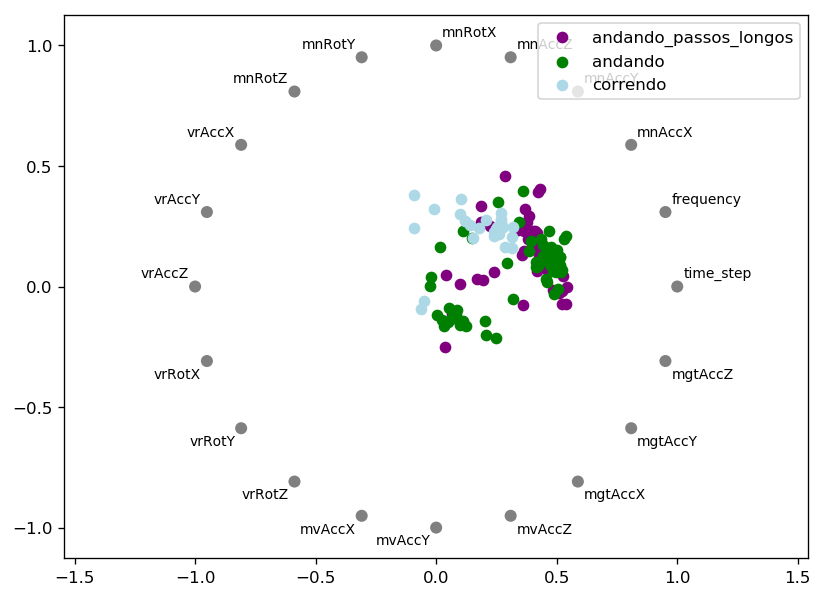

In [56]:
# Import the radviz from pandas
from pandas.plotting import radviz
import matplotlib.pyplot as plt

%matplotlib inline

# Configure the graphics rendering resolution
plt.figure(num=None, figsize=(8, 6), dpi=120, facecolor='w', edgecolor='k')

# View the graph by passing the data set and information what is the label
radviz(data, 'label', color=['purple', 'green', 'lightblue'])

Looking at the graph, we can see that the movements (colored data points) are very close to each other, especially the movement walking and walking with long strides. A machine learning model is able to recognize patterns in the data, even if it is minimal, and classify the movements according to these found patterns.

---
# Preparing the data

Before data is used as input to the machine learning model, they must pass a **pre-processing**, which will clean, restructure, and format the data. Fortunately this data set has no invalid or missing resources, however, there are some adjustments that should be applied to get better model performance, better result, and predictive power for almost all algorithms.

### Dividing the data into features and labels

In [57]:
# Retrieve the values of the label column
labels = data['label']

# Removes the column containing the data labels, to have only the features
features = data.drop('label', axis=1)

# View features
display(features.head())

,time_step,frequency,mnAccX,mnAccY,mnAccZ,mnRotX,mnRotY,mnRotZ,vrAccX,vrAccY,vrAccZ,vrRotX,vrRotY,vrRotZ,mvAccX,mvAccY,mvAccZ,mgtAccX,mgtAccY,mgtAccZ
0,0.03,16.296296,0.477244,3.169604,8.900046,-0.082454,0.005611,-0.073008,2.047034,4.696368,7.610618,0.183038,0.070952,0.156839,5.841399,14.870822,36.087692,1.657438,1.265609,1.074175
1,0.05,9.885057,0.396612,2.975085,8.914026,-0.002902,0.022739,0.040812,1.050456,1.100156,3.646152,0.132366,0.148909,0.173602,5.918188,16.987856,49.092506,1.951214,1.948800,1.835788
2,0.04,12.310606,-0.018501,3.842911,9.250978,0.087451,-0.067840,-0.103189,2.552421,7.034718,13.681029,0.157709,0.078806,0.172278,7.494050,21.901121,46.730671,1.802384,1.477678,1.263756
3,0.02,24.404762,-1.457043,2.423958,9.461543,-0.011870,-0.050449,-0.079136,1.420136,0.289608,2.229848,0.213151,0.195535,0.086925,7.042978,9.290454,35.840048,1.743628,1.942415,1.585718
4,0.03,16.339869,-1.772836,3.107674,8.305908,0.101830,0.025128,-0.082216,2.346910,1.969358,10.981955,0.258971,0.413173,0.141768,9.660620,14.059122,36.871278,1.707770,1.748737,0.930422


### Normalizing numerical values

It is advisable to standardize numerical resources to ensure that each resource is treated equally when applying the supervised model. Applying normalization to data also helps in the performance of the learning algorithm when processing numeric values. In the case of the data set used in this project, there are very large numerical values, such as the frequency, magnitude of acceleration and FFT magnitude of the acceleration.

The code block below normalizes each numeric resource using the **Sklearn** `MinMaxScaler`.

In [58]:
from sklearn.preprocessing import MinMaxScaler

# Columns to be normalized in dataset
columns = ['time_step','frequency','mnAccX','mnAccY','mnAccZ','mnRotX','mnRotY','mnRotZ',
                           'vrAccX','vrAccY','vrAccZ','vrRotX','vrRotY','vrRotZ','mvAccX','mvAccY','mvAccZ',
                           'mgtAccX','mgtAccY','mgtAccZ']

# Initializes a scaler with normalization pattern between 0 and 1
scaler = MinMaxScaler()

# Get the features of the dataset
features_minmax = pd.DataFrame(data = features)

# Applies normalizes to features
features_minmax[columns] = scaler.fit_transform(features_minmax[columns])

# Displays the normalized features
display(features_minmax.head())

,time_step,frequency,mnAccX,mnAccY,mnAccZ,mnRotX,mnRotY,mnRotZ,vrAccX,vrAccY,vrAccZ,vrRotX,vrRotY,vrRotZ,mvAccX,mvAccY,mvAccZ,mgtAccX,mgtAccY,mgtAccZ
0,0.013986,0.332378,0.433414,0.656115,0.836862,0.075548,0.454479,0.290998,0.028899,0.041882,0.078686,0.029279,0.007301,0.003594,0.015168,0.039207,0.096990,0.737999,0.328039,0.314037
1,0.027972,0.198774,0.428751,0.646021,0.838082,0.174188,0.473737,0.316224,0.012346,0.007942,0.032604,0.019842,0.015767,0.004145,0.015578,0.048576,0.145752,0.963537,0.954316,0.879865
2,0.020979,0.249320,0.404740,0.691054,0.867477,0.286220,0.371892,0.284309,0.037293,0.063951,0.149246,0.024562,0.008154,0.004102,0.023992,0.070318,0.136896,0.849277,0.522441,0.454884
3,0.006993,0.501351,0.321535,0.617422,0.885847,0.163067,0.391445,0.289640,0.018486,0.000292,0.016142,0.034887,0.020830,0.001294,0.021583,0.014512,0.096061,0.804169,0.948463,0.694080
4,0.013986,0.333286,0.303269,0.652901,0.785030,0.304049,0.476424,0.288957,0.033880,0.016145,0.117873,0.043420,0.044465,0.003098,0.035559,0.035615,0.099928,0.776640,0.770920,0.207239


### Pre-processing of data

Learning algorithms expect the input to be numeric, which requires the conversion of `labels` into numeric values.

To encode the target labels `outcomes` into numbers, we will use the `LabelEncoder` of the **Sklearn** that encodes N-Classes into numeric labels.

In [59]:
from sklearn.preprocessing import LabelEncoder

# Initializes encoder
encoded = LabelEncoder()

# Codes the labels
encoded.fit(labels)

# Transforms labels into coded values
outcomes = encoded.transform(labels)

# Displays the coded labels
print(outcomes)

[1 0 1 0 1 1 1 0 1 1 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 2 1 1 1 0 1 0 1 1 0 0 1
 1 1 0 0 1 1 0 0 1 1 1 0 1 0 1 0 1 0 0 0 0 0 0 1 1 1 0 1 0 1 0 1 1 1 0 0 0
 0 1 0 0 0 0 0 0 0 0 0 2 1 2 1 1 0 1 0 1 2 0 0 1 1 2 1 0 1 1 1 0 0 1 2 1 2
 0 2 0 2 2 1 2 0 0 2 1 2 2 1 1 0 0 0 1 0 0 0 0 1 0 2 2 1 0 0 0 2 2 2 0 2 2
 2 0 2 1 2 0 1 0 0 0 0 2]


### Training and test dataset

After all the labels were converted into numeric resources and all numeric resources were normalized. The data will be divided into training and test set. 80% of the data will be used for training and 20% for testing.

The code block below performs division.

In [99]:
from sklearn.model_selection import train_test_split

# Divide the data (resources and labels) into training and test set.
X_train, X_test, y_train, y_test = train_test_split(features, outcomes, test_size = 0.2, random_state = 0)

# Display division results
print("Training dataset has {} samples.".format(X_train.shape[0]))
print("Test dataset has {} samples".format(X_test.shape[0]))

Training dataset has 128 samples.
Test dataset has 32 samples


----
## Evaluating model performance

In this section, we will evaluate 3 supervised learning models and determine which is best for our problem. 

The models that we will evaluate are:

- KNeighbors (KNN)
- Random Forest
- Multi-layer Perceptron (MLP)

**KNeighbors (KNN)**

*KNN* is an instance-based, non-parametric, supervised learning algorithm. It sorts an object by checking its closest neighbors, and assigning the most common class among them. The boundary of selected neighbors is given by the hyperparameter K. The *KNN* is a very simple algorithm, but even with its simplicity, it can overcome more powerful classifiers such as Artificial Neural Networks.

Since the algorithm is not parametric, it does not make explicit assumptions, avoiding an incorrect modeling of the data distribution.

Its type of learning is not defined by a predictive model, its knowledge is obtained through the training instances that have been memorized. When we request a prediction of a new entry, it queries in its knowledge base to respond with which class the object looks like.

One major drawback of * KNN * is that it does not handle categorical variables very well. For example, if there are samples of more frequent classes, the prediction of a new entry can be dominated by the most common class among neighbors because of their large numbers.

*KNN* fits very well with continuous values, as is the case with our data set. One of the ways he calculates the distance between neighbors is by using a very common metric for continuous variables, the [euclidean distance](https://en.wikipedia.org/wiki/Euclidean_distance).

**Random Forest**

*Random Forest* is a supervised learning algorithm. The algorithm constructs a set of decision trees, and combines them to obtain a more stable and accurate result.

A great advantage is that it can be used for both regression and classification problems. Because in this project we need to identify which movement the person has made, we will use to do the classification.

Another quality of the algorithm is that it can tell us how important each feature was in prediction. Doing an impurity reduction analysis that one feature had on each tree node.

The main disadvantage of the algorithm is that if it has a very large number of trees it can become slow and not produce a good result for predictions.

A *Random Forest* is a very practical and easy-to-use algorithm, and can produce very good predict without having to change your default hyperparameters. In addition, it has a very good performance.

**Multi-layer Perceptron (MLP)**

*MLP* is a supervised learning algorithm that uses a technique called [backpropagation](https://en.wikipedia.org/wiki/Backpropagation) for training. It is a deep artificial neural network, which is composed of more than one perceptron. Its structure is composed of an input layer to receive the signal, an output layer that makes prediction about the input, and between the input and output layer, has the computational mechanism of the MLP, the hidden layers.

Its learning is done by adjusting the connection weights between the neurons. The backpropagation calculates the error generated in the output and distributes this error by going back across all layers of the network.

The advantage of using a neural network such as * MLP * is its ability to learn and model nonlinear and complex problems. Another advantage is that after learning from the initial inputs and their relationships, it can generate hidden relationships in unseen data, making the model generalize and predict unseen data.

Unlike other techniques, neural networks do not restrict how an input variable should be distributed.

### Training Pipeline and Predict

The code block below is a pipeline that allows you to quickly model trails and perform predictions on your test data.

In [100]:
from sklearn.metrics import fbeta_score, accuracy_score
from time import time

def train(learner, X_train, y_train, X_test, y_test):
    results = {}
    
    start = time()
    learner = learner.fit(X_train, y_train)
    end = time()
    
    results['train_time'] = start - end
    
    start = time()
    predictions_test = learner.predict(X_test)
    predictions_train = learner.predict(X_train)
    end = time()
    
    results['pred_time'] = start - end
    
    results['acc_train'] = accuracy_score(y_train, predictions_train)
    results['acc_test'] = accuracy_score(y_test, predictions_test)
    
    results['f_train'] = fbeta_score(y_train, predictions_train, 0.5, average="micro")
    results['f_test'] = fbeta_score(y_test, predictions_test, 0.5, average="micro")
    
    print("{} trained".format(learner.__class__.__name__))
    
    return results

import matplotlib.patches as mpatches
def evaluate(results):
    
    fig, ax = plt.subplots(2, 3, figsize = (15,7))
    plt.subplots_adjust(hspace=0.5, wspace=0.3)
    
    bar_width = 0.45
    colors = ['#01579B','#C62828','#00796B']
    
    for k, model in enumerate(results.keys()):
        for j, metric in enumerate(['train_time', 'acc_train', 'f_train', 'pred_time', 'acc_test', 'f_test']):
        
            ax[j//3, j%3].bar(k + bar_width, results[model][metric], width = 0.9, color = colors[k])
            ax[j//3, j%3].set_xticks([0.45, 1.45, 2.45])
            ax[j//3, j%3].set_xticklabels(["R", "K", "M"])
            ax[j//3, j%3].set_xlabel("Models")
            ax[j//3, j%3].set_xlim((-0.1, 3.0))
    
    ax[0, 0].set_ylabel("Time")
    ax[0, 1].set_ylabel("Accuracy Score")
    ax[0, 2].set_ylabel("F-score")
    ax[1, 0].set_ylabel("Time")
    ax[1, 1].set_ylabel("Accuracy Score")
    ax[1, 2].set_ylabel("F-score")

    ax[0, 0].set_title("Training Model")
    ax[0, 1].set_title("Accuracy score on training dataset")
    ax[0, 2].set_title("F-score on training dataset")

    ax[1, 0].set_title("Test Model")
    ax[1, 1].set_title("Accuracy Score on test data")
    ax[1, 2].set_title("F-score on test dataset")
    
    patches = []
    for i, model in enumerate(results.keys()):
        patches.append(mpatches.Patch(color = colors[i], label = model))
    
    plt.legend(handles=patches, bbox_to_anchor = (-.80, 2.85),
              loc = 'upper center', borderaxespad = 0., ncol = 3, fontsize = 'x-large')
    
    plt.show()

### Evaluation of models

The code block below implements the templates the templates and performs the training.

RandomForestClassifier trained
KNeighborsClassifier trained
MLPClassifier trained


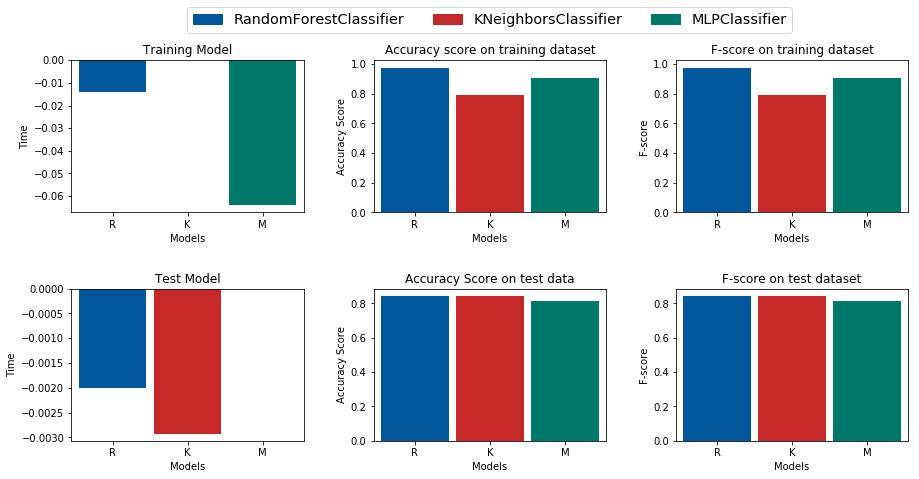

In [103]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

models = [    
    RandomForestClassifier(random_state=1), 
    KNeighborsClassifier(n_neighbors=5), 
    MLPClassifier(solver='lbfgs', hidden_layer_sizes=(3, 2), random_state=1)
]

results = {}
for model in models:
    name = model.__class__.__name__
    results[name] = {}
    results[name] = train(model, X_train, y_train, X_test, y_test)

evaluate(results)

Among the three models chosen, the model with the best performance in the classification of movements was `Random Forest`. Their accuracy and f-score scores are higher than the other models in the training set. Although the `KNN` has obtained a score similar to `Random Forest`, its predict time is very long, which is not recommended when we need faster answers, as is the case of the problem proposed in this work, which must respond quickly which movement the user has made.

The `MLP` has a much faster prediction time than the other two, and its ability to solve complex problems could easily solve the problem of identifying physical movements, but its training is too long and the time to develop the neural network to have a good move classification would take longer, which is not the case with the presented problem, which needs to be developed in the short term and needs to have a fast predict.

----
## Improving Results

The result of the chosen model can be improved by using its hyperparameters, which are the configurations of an algorithm that can be adjusted to optimize the performance of a model.

Sklearn defines a set of standard hyperparameters for each model, but they are not guaranteed as ideal for a given problem. Defining the best hyperparameters before training a model is often impossible. Adjusting hyperparameters depends a great deal on trying out various combinations and evaluating which configuration has performance for the model in our problem domain.

The optimization of the model can not be evaluated only for [overfitting](https://en.wikipedia.org/wiki/Overfitting) training data. Optimizing the model for the training dataset can give a very good score, but will not be able to recognize new data, such as a set of tests.

To find the best hyperparameters will be used the **Sklearn** GridSearchCV method.

## Grid Search with Cross Validation

GridSearchCV is a method that evaluates all combinations that were defined using the [cross-validation](https://towardsdatascience.com/cross-validation-in-machine-learning-72924a69872f) technique, and finds the best values for the hyperparameters.

In [104]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import fbeta_score, make_scorer

model = RandomForestClassifier(random_state=1)

parameters = {
    'bootstrap': [True],
    'max_depth': [80, 90, 100, 110],
    'max_features': [2, 3],
    'min_samples_leaf': [3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 200, 300, 1000]
}

scorer = make_scorer(fbeta_score, beta=0.5,  average="micro")

grid = GridSearchCV(estimator=model, param_grid=parameters, scoring=scorer, cv = 3, n_jobs = -1, verbose = 2)
grid_fit = grid.fit(X_train, y_train)

best_model = grid_fit.best_estimator_

predictions = (model.fit(X_train, y_train)).predict(X_test)
best_predictions = best_model.predict(X_test)
grid.best_params_

Fitting 3 folds for each of 288 candidates, totalling 864 fits


[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:   15.6s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   28.2s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:   54.7s
[Parallel(n_jobs=-1)]: Done 632 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 864 out of 864 | elapsed:  2.1min finished


{'bootstrap': True,
 'max_depth': 80,
 'max_features': 3,
 'min_samples_leaf': 3,
 'min_samples_split': 12,
 'n_estimators': 1000}

In [105]:
accuracy = ['Accuracy score', accuracy_score(y_test, predictions), accuracy_score(y_test, best_predictions)]
fscore = ['F-score', fbeta_score(y_test, predictions, beta = 0.5,  average="micro"), fbeta_score(y_test, best_predictions, beta = 0.5, average="micro")]

pd.DataFrame([accuracy, fscore], columns=['Métrica', 'Modelo não otimizado', 'Modelo otimizado'])

,Métrica,Modelo não otimizado,Modelo otimizado
0,Accuracy score,0.84375,0.90625
1,F-score,0.84375,0.90625


After adjusting, even if small, the optimized model has a metric score greater than the non-optimized.

----
## Saving the machine learning model

Once adjusted, even if small, the optimized model showed a higher than non-optimized metric score.

In [106]:
from sklearn.externals import joblib
joblib.dump(best_model, '../data/models/model_final.joblib')

['../data/models/model_final.joblib']